<a href="https://colab.research.google.com/github/vijayvaradh/Telco_churn-prediction/blob/main/Churn_prediction_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
url = 'https://github.com/vijayvaradh/Telco_churn-prediction'
df_train = pd.read_csv('https://raw.githubusercontent.com/vijayvaradh/Telco_churn-prediction/main/cell2celltrain.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/vijayvaradh/Telco_churn-prediction/main/cell2cellholdout.csv')

In [124]:
df_train.shape

(51047, 58)

In [125]:
df_test.shape

(20000, 58)

In [126]:
20000/(51047+20000)

0.28150379326361424

In [127]:
df_train.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [163]:
df_train.head(10)

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn_new
0,3000002,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,1
1,3000010,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,1
2,3000014,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes,0
3,3000022,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,6,No,0,10,No,4-Medium,Other,Other,No,0
4,3000026,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,9,No,1,10,No,1-Highest,Other,Professional,Yes,1
5,3000030,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,9.0,...,1,No,1,30,No,3-Good,Other,Other,Yes,0
6,3000038,31.66,26.0,30.0,0.25,0.0,0.0,60.0,4.0,0.0,...,9,No,1,30,No,1-Highest,Other,Self,Yes,0
7,3000042,62.13,98.0,66.0,2.48,0.0,0.0,24.0,6.8,0.0,...,6,No,0,30,No,1-Highest,Other,Professional,No,0
8,3000046,35.30,24.0,35.0,0.00,0.0,0.0,20.0,-0.3,0.0,...,9,No,0,80,No,1-Highest,Other,Other,Yes,0
9,3000050,81.00,1056.0,75.0,0.00,0.0,0.0,43.0,2.4,0.0,...,5,No,1,30,No,3-Good,Other,Professional,No,0


In [128]:
df_train.dtypes

CustomerID                     int64
Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
H

In [129]:
df_train.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [130]:
df_train.dropna(inplace = True)

In [131]:
df_train.isnull().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

In [141]:
pd.crosstab(df_train.Churn_new,df_train.MaritalStatus).apply(lambda r: r/len(df_train.Churn), axis=1)*100

MaritalStatus,No,Unknown,Yes
Churn_new,,,
0,18.523878,26.197942,26.646165
1,6.795707,11.285978,10.550330


In [161]:
df_train = df_train.drop(['Churn'],axis =1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49752 entries, 0 to 51043
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49752 non-null  int64  
 1   MonthlyRevenue             49752 non-null  float64
 2   MonthlyMinutes             49752 non-null  float64
 3   TotalRecurringCharge       49752 non-null  float64
 4   DirectorAssistedCalls      49752 non-null  float64
 5   OverageMinutes             49752 non-null  float64
 6   RoamingCalls               49752 non-null  float64
 7   PercChangeMinutes          49752 non-null  float64
 8   PercChangeRevenues         49752 non-null  float64
 9   DroppedCalls               49752 non-null  float64
 10  BlockedCalls               49752 non-null  float64
 11  UnansweredCalls            49752 non-null  float64
 12  CustomerCareCalls          49752 non-null  float64
 13  ThreewayCalls              49752 non-null  flo

In [164]:
df_train[["MonthlyMinutes","MonthlyRevenue","TotalRecurringCharge","Churn_new"]].groupby("Churn_new").mean().round(2)

,MonthlyMinutes,MonthlyRevenue,TotalRecurringCharge
Churn_new,,,
0,541.81,59.06,47.72
1,483.16,57.87,44.62


In [179]:
df_train[["MadeCallToRetentionTeam","Churn_new"]].groupby("Churn_new").count().apply(lambda r: r/len(df_train.Churn_new), axis=1)*100

,MadeCallToRetentionTeam
Churn_new,
0,71.367985
1,28.632015


0.7710385346466218

In [137]:
df_train["Churn"].describe()

count     49752
unique        2
top          No
freq      35507
Name: Churn, dtype: object

In [138]:
df_train['Churn_new'] = df_train['Churn'].map({'Yes': 1, 'No': 0})

In [139]:
df_train["Churn_new"].describe()

count    49752.000000
mean         0.286320
std          0.452045
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Churn_new, dtype: float64

In [171]:
df_train[["MonthsInService","DroppedCalls","CustomerCareCalls","RoamingCalls","BlockedCalls","OutboundCalls","InboundCalls","Churn_new"]].groupby("Churn_new").mean() 

,MonthsInService,DroppedCalls,CustomerCareCalls,RoamingCalls,BlockedCalls,OutboundCalls,InboundCalls
Churn_new,,,,,,,
0,18.622581,6.096770,1.988414,1.157991,4.108522,26.071040,8.519345
1,19.000562,5.795662,1.588922,1.396658,4.001271,23.553843,7.277101


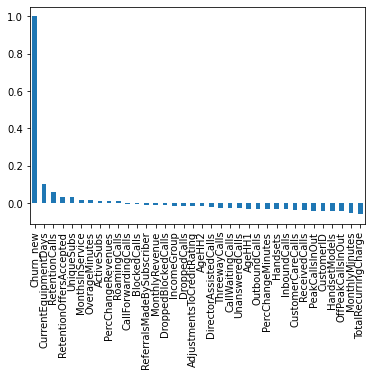

In [148]:
df_train.corr()['Churn_new'].sort_values(ascending = False).plot(kind='bar')

In [162]:
import seaborn as sn
df_corr =df.corr()
df_corr
sns.heatmap(df_train, annot=True)

ValueError: ignored

In [ ]:
df['churn'].replace(to_replace="Yes", value = 1, inplace = True)
df['churn'].replace(to_replace="No", value = 0, inplace = True)

In [ ]:
df_Dummies = pd.get_dummies(df)
df_Dummies.head()

NameError: ignored

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df_Dummies.drop(['churn','MeanMonthlyUsage'], axis =1 )
y = df_Dummies.churn
vif_df["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data2["features"] = x.columns


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored